In [58]:
%load_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import risk_kit as rk

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [43]:
ind = rk.get_ind_returns()
print(ind.shape)
ind.head()

(1110, 30)


,Food,Beer,Smoke,Games,Books,Hshld,Clths,Hlth,Chems,Txtls,...,Telcm,Servs,BusEq,Paper,Trans,Whlsl,Rtail,Meals,Fin,Other
1926-07,0.0056,-0.0519,0.0129,0.0293,0.1097,-0.0048,0.0808,0.0177,0.0814,0.0039,...,0.0083,0.0922,0.0206,0.0770,0.0193,-0.2379,0.0007,0.0187,0.0037,0.0520
1926-08,0.0259,0.2703,0.0650,0.0055,0.1001,-0.0358,-0.0251,0.0425,0.0550,0.0814,...,0.0217,0.0202,0.0439,-0.0238,0.0488,0.0539,-0.0075,-0.0013,0.0446,0.0676
1926-09,0.0116,0.0402,0.0126,0.0658,-0.0099,0.0073,-0.0051,0.0069,0.0533,0.0231,...,0.0241,0.0225,0.0019,-0.0554,0.0005,-0.0787,0.0025,-0.0056,-0.0123,-0.0386
1926-10,-0.0306,-0.0331,0.0106,-0.0476,0.0947,-0.0468,0.0012,-0.0057,-0.0476,0.0100,...,-0.0011,-0.0200,-0.0109,-0.0508,-0.0264,-0.1538,-0.0220,-0.0411,-0.0516,-0.0849
1926-11,0.0635,0.0729,0.0455,0.0166,-0.0580,-0.0054,0.0187,0.0542,0.0520,0.0311,...,0.0163,0.0377,0.0364,0.0384,0.0160,0.0467,0.0652,0.0433,0.0224,0.0400


# Efficient frontier

In [44]:
# Excepted returns
er = rk.annualized_return(ind["1996":"2000"], 12)

# Covariance matrix
cov = ind["1996":"2000"].cov()

In [45]:
assets = ['Food', 'Beer', 'Smoke', 'Coal']
er[assets]

Food     0.116799
Beer     0.141126
Smoke    0.107830
Coal     0.414689
dtype: float64

In [46]:
cov.loc[assets, assets]

,Food,Beer,Smoke,Coal
Food,0.002609,0.002379,0.002061,0.000027
Beer,0.002379,0.005264,0.001359,0.001728
Smoke,0.002061,0.001359,0.008349,-0.000733
Coal,0.000027,0.001728,-0.000733,0.018641


In [47]:
weights = np.repeat(1/4, 4)
rk.portfolio_return(weights, er[assets])

0.19511097196038385

In [48]:
rk.portolio_volatility(weights, cov.loc[assets, assets])

0.055059195776437045

# 2 Asset frontier

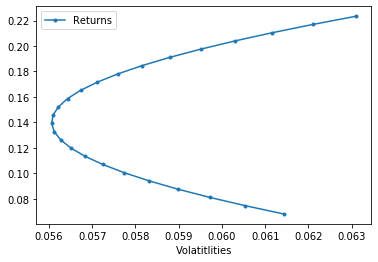

In [49]:
assets = ['Games', 'Fin']
rk.plot_ef2(n_points=25, er=er[assets], cov=cov.loc[assets, assets])

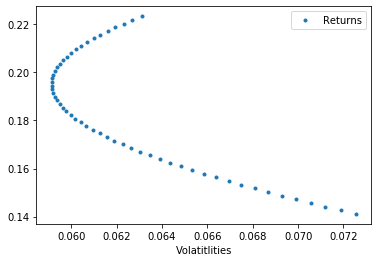

In [50]:
assets = ['Fin', 'Beer']
rk.plot_ef2(n_points=55, er=er[assets], cov=cov.loc[assets, assets], style=".")

# N Asset frontier - Applying Quadprog

```python
def plot_ef(n_points, er, cov, style=".-"):
    """
    Plot 1 asset efficient frontier
    """
    weights = minimize_vol(target_return) ????
    rets = [portfolio_return(w, er) for w in weights]
    vols = [portolio_volatility(w, cov) for w in weights]
    ef = pd.DataFrame({
        "Returns": rets,
        "Volatitlities": vols
    })
    ef.plot.line(x="Volatitlities", y="Returns", style=style)
```

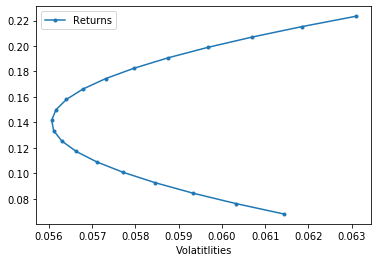

In [51]:
assets = ["Games", "Fin"]
rk.plot_ef2(n_points=20, er=er[assets], cov=cov.loc[assets, assets])

In [53]:
w15 = rk.minimize_vol(0.15, er[assets], cov.loc[assets, assets])
vol15 = rk.portolio_volatility(w15, cov.loc[assets, assets])
w15, vol15

(array([0.47287631, 0.52712369]), 0.056163669406706564)

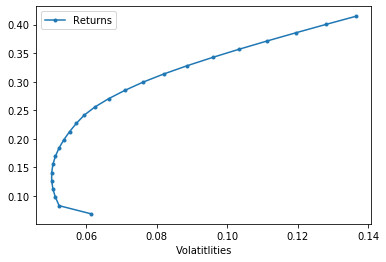

In [61]:
assets = ["Smoke", "Fin", "Games", "Coal"]
rk.plot_ef(25, er[assets], cov.loc[assets, assets])